<h1 style="text-align: center;"> EE6380 - DEEP LEARNING - ASSIGNMENT 3</h1>
<h2 style="text-align: right;">  ATHARV RAMESH NAIR <br>EE20BTECH11006</h2>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### SIGMOID FUNCTION, WEIGHT INITILIZATION, FORWARD PROPOGATION

In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def init_weights(nh,ni,no):
    ## First Layer Weights & Bias
    alpha = np.random.randn(nh,ni+1)

    ## Second Layer Weights & Bias
    beta = np.random.randn(no,nh+1)
 
    return alpha,beta

def ANN_model(x,alpha,beta):

    N = x.shape[1]
    ## Adding Bias
    x = np.vstack((np.ones(N).reshape(1,N),x))
    z = sigmoid(np.dot(alpha,x))
    ## Adding Bias
    z = np.vstack((np.ones(N).reshape(1,N),z))
    ## Output Layer Output
    y = sigmoid(np.dot(beta,z))
    return x,z,y


DATA GENERATION

In [3]:
def generate_data(N = 10000, noise_var=0.05, operation='xor',split=0.8):
    x = np.random.randint(0,2,(2,N))
    if operation == 'xor':
        y = np.logical_xor(x[0],x[1])
    elif operation == 'and':
        y = np.logical_and(x[0],x[1])
    elif operation == 'or':
        y = np.logical_or(x[0],x[1])
    
    y = y.astype(int)
    y = y.reshape(1,N)

    # x_noise = x + np.sqrt(noise_var)*np.random.randn(2,N)
    x_noise = x + np.random.normal(0, noise_var, x.shape)
    x_train = x_noise[:,:int(0.8*N)]
    y_train = y[:,:int(0.8*N)]
    x_test = x_noise[:,int(0.8*N):]
    y_test = y[:,int(0.8*N):]
    return x_train,y_train,x_test,y_test


MODEL TRAINING 

Gradient Values
$$
L = \sum (y_{\text{pred}} - y)^2
$$

$$
\frac{\partial L}{\partial \beta} = 2 \times (y_{\text{pred}} - y) \times y_{\text{pred}}(1 - y_{\text{pred}})  \quad z^T
$$
$$
\text{where} z = [1, z_1, z_2]
$$
$$
\frac{\partial L}{\partial \alpha} = 2 \times \beta^T (y_{\text{pred}} - y) \times y_{\text{pred}}(1 - y_{\text{pred}}) \times z(1 - z) \quad x^T

$$
where $$x = [1,x_1,x_2] \quad \quad \beta = [\beta_1,\beta_2] \quad \text{(no bias term)} \quad \quad  z = [z_1,z_2] $$





In [4]:
def train_model(x_train,y_train,x_test,y_test,nh=2,epochs=100,lr=0.01,operation='xor'):

    ni = x_train.shape[0]
    no = y_train.shape[0]
    N_test = x_test.shape[1]
    N_train = x_train.shape[1]
    train_loss_list = []
    test_loss_list = []
    train_accuracy_list = []
    test_accuracy_list = []
    alpha,beta = init_weights(nh,ni,no)

    for epoch in range(epochs):
        x,z,y_pred = ANN_model(x_train,alpha,beta)

        train_loss = np.sum((y_pred-y_train)**2)/N_train
        train_accuracy = np.sum(y_train==np.round(y_pred))/N_train

        _,_,y_pred_test = ANN_model(x_test,alpha,beta)
        # print(y_pred_test.shape)
        test_loss = np.sum((y_pred_test-y_test)**2)/N_test
        test_accuracy = np.sum(y_test==np.round(y_pred_test))/N_test
        
        ## Backpropagation
        grad_beta = 2*np.dot((y_pred-y_train)*y_pred*(1-y_pred),z.T)
        grad_alpha = 2*np.dot(np.dot(beta[:,1:].T,(y_pred-y_train)*y_pred*(1-y_pred)) *z[1:,:]*(1-z[1:,:]),x.T)

        beta = beta - lr*grad_beta
        alpha = alpha - lr*grad_alpha
        
    
        train_loss_list.append(train_loss)
        test_loss_list.append(test_loss)
        train_accuracy_list.append(train_accuracy)
        test_accuracy_list.append(test_accuracy)

        if epoch%(epochs-1) == 0:
            if epoch == 0:
                print(f'Final :: Train Loss(Mean) {train_loss:.4f} Test Loss(Mean) {test_loss:.4f} Train Accuracy {train_accuracy:.4f} Test Accuracy {test_accuracy:.4f}')
            else:
                print(f'Initial :: Train Loss(Mean) {train_loss:.4f} Test Loss(Mean) {test_loss:.4f} Train Accuracy {train_accuracy:.4f} Test Accuracy {test_accuracy:.4f}')


            # print(f'Training Loss {train_loss:.4f} Test Loss {test_loss:.4f}')

    ## Plotting Loss and Accuracy
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.plot(train_loss_list,label='Train Loss')
    plt.plot(test_loss_list,label='Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(train_accuracy_list,label='Train Accuracy')
    plt.plot(test_accuracy_list,label='Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.suptitle('Operation: '+operation.upper())
    plt.show()
    return alpha,beta


## TRAINING FOR AND , OR , XOR OPERATIONS

AND OPERATION
Final :: Train Loss(Mean) 0.3237 Test Loss(Mean) 0.3263 Train Accuracy 0.2537 Test Accuracy 0.2550
Initial :: Train Loss(Mean) 0.0050 Test Loss(Mean) 0.0052 Train Accuracy 1.0000 Test Accuracy 1.0000


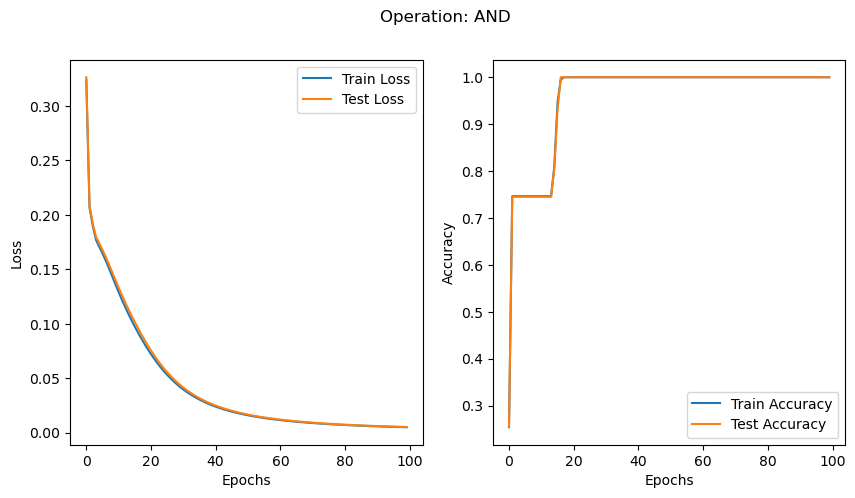

OR OPERATION
Final :: Train Loss(Mean) 0.1952 Test Loss(Mean) 0.2055 Train Accuracy 0.7588 Test Accuracy 0.7150
Initial :: Train Loss(Mean) 0.0017 Test Loss(Mean) 0.0018 Train Accuracy 1.0000 Test Accuracy 1.0000


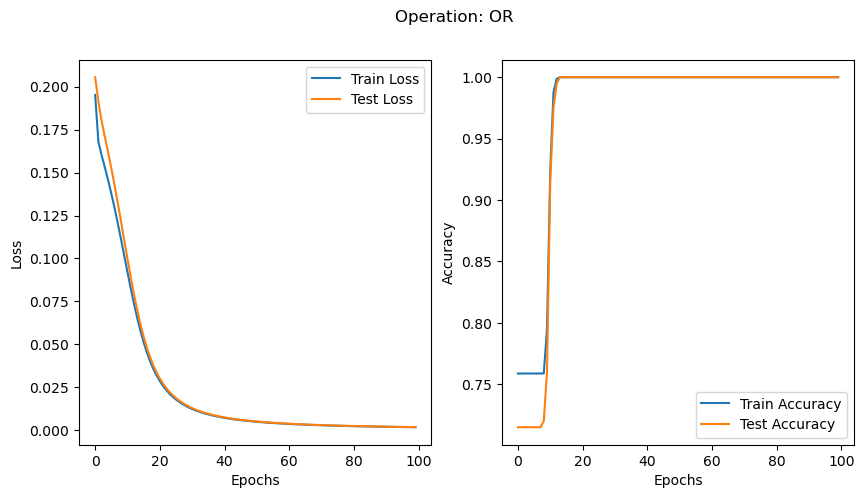

XOR OPERATION
Final :: Train Loss(Mean) 0.2628 Test Loss(Mean) 0.2654 Train Accuracy 0.5012 Test Accuracy 0.4900
Initial :: Train Loss(Mean) 0.0115 Test Loss(Mean) 0.0122 Train Accuracy 1.0000 Test Accuracy 1.0000


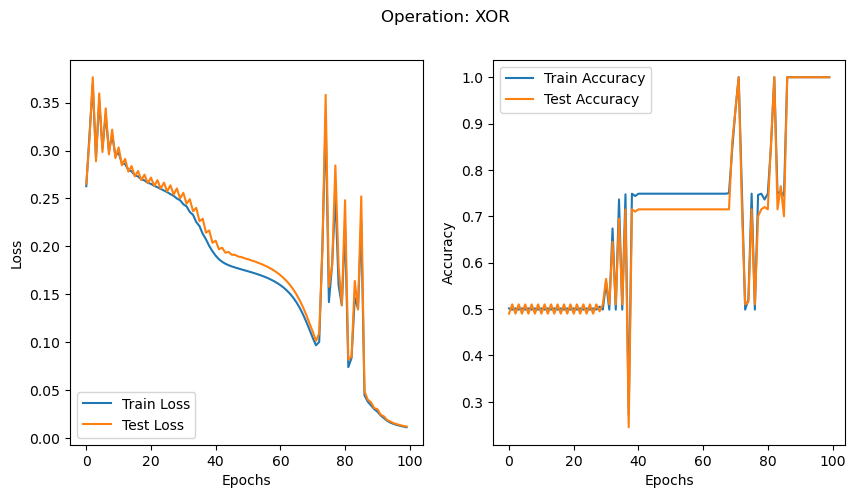

In [6]:
print('AND OPERATION')
x_train,y_train,x_test,y_test = generate_data(N=1000,noise_var=0.05,operation='and')
alpha,beta, = train_model(x_train,y_train,x_test,y_test,nh=2,epochs=100,lr=0.01,operation='and')
print('OR OPERATION')
x_train,y_train,x_test,y_test = generate_data(N=1000,noise_var=0.05,operation='or')
alpha,beta, = train_model(x_train,y_train,x_test,y_test,nh=2,epochs=100,lr=0.01,operation='or')
print('XOR OPERATION')
x_train,y_train,x_test,y_test = generate_data(N=1000,noise_var=0.05,operation='xor')
alpha,beta, = train_model(x_train,y_train,x_test,y_test,nh=2,epochs=100,lr=0.02,operation='xor')

## EXPERIMENTING WITH DIFFERENT VALUES OF N = 100,1000,10000

### i) AND

Final :: Train Loss(Mean) 0.6881 Test Loss(Mean) 0.5827 Train Accuracy 0.1375 Test Accuracy 0.2500
Initial :: Train Loss(Mean) 0.0040 Test Loss(Mean) 0.0044 Train Accuracy 1.0000 Test Accuracy 1.0000


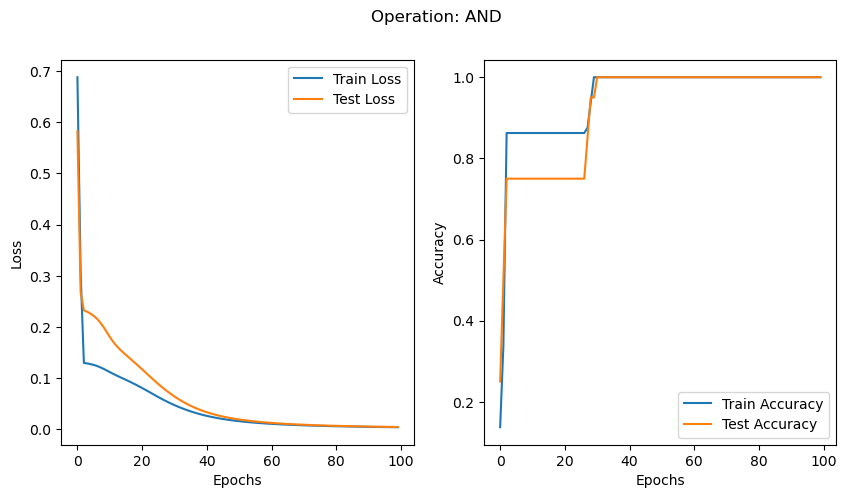

Final :: Train Loss(Mean) 0.3613 Test Loss(Mean) 0.3793 Train Accuracy 0.2687 Test Accuracy 0.2350
Initial :: Train Loss(Mean) 0.0050 Test Loss(Mean) 0.0046 Train Accuracy 1.0000 Test Accuracy 1.0000


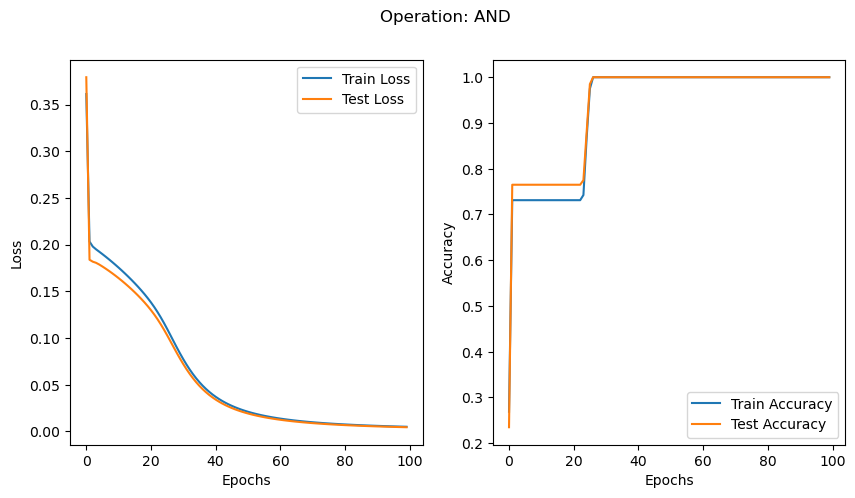

Final :: Train Loss(Mean) 0.5747 Test Loss(Mean) 0.5738 Train Accuracy 0.2451 Test Accuracy 0.2480
Initial :: Train Loss(Mean) 0.0073 Test Loss(Mean) 0.0072 Train Accuracy 1.0000 Test Accuracy 1.0000


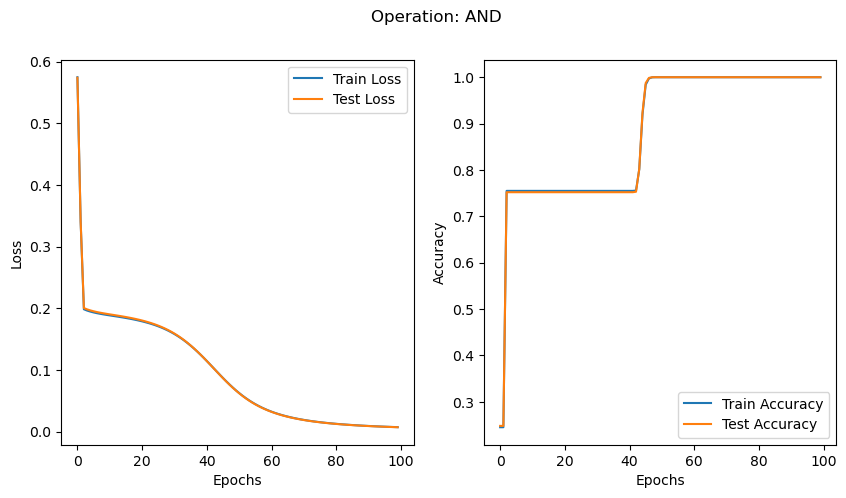

In [7]:
## Repeating Training and Testing for 3 different choices of N and plotting the results
N_list = [100,1000,10000]
lr_list = [0.1,0.01,0.001]
for i in range(len(N_list)):
    x_train,y_train,x_test,y_test = generate_data(N=N_list[i],noise_var=0.05,operation='and')
    alpha,beta, = train_model(x_train,y_train,x_test,y_test,nh=2,epochs=100,lr = lr_list[i],operation='and')


### ii) OR OPERATION

Final :: Train Loss(Mean) 0.2090 Test Loss(Mean) 0.1682 Train Accuracy 0.7125 Test Accuracy 0.8000
Initial :: Train Loss(Mean) 0.0018 Test Loss(Mean) 0.0017 Train Accuracy 1.0000 Test Accuracy 1.0000


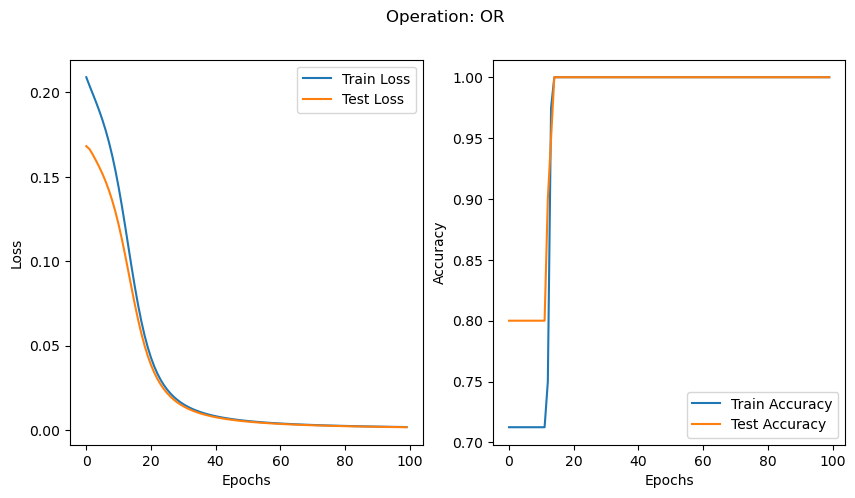

Final :: Train Loss(Mean) 0.2458 Test Loss(Mean) 0.2188 Train Accuracy 0.7412 Test Accuracy 0.7700
Initial :: Train Loss(Mean) 0.0025 Test Loss(Mean) 0.0024 Train Accuracy 1.0000 Test Accuracy 1.0000


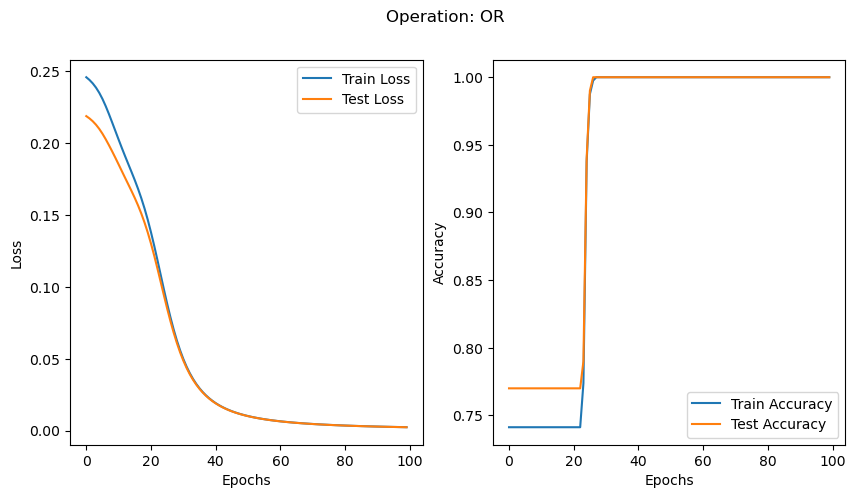

Final :: Train Loss(Mean) 0.2027 Test Loss(Mean) 0.2062 Train Accuracy 0.7505 Test Accuracy 0.7310
Initial :: Train Loss(Mean) 0.0020 Test Loss(Mean) 0.0020 Train Accuracy 1.0000 Test Accuracy 1.0000


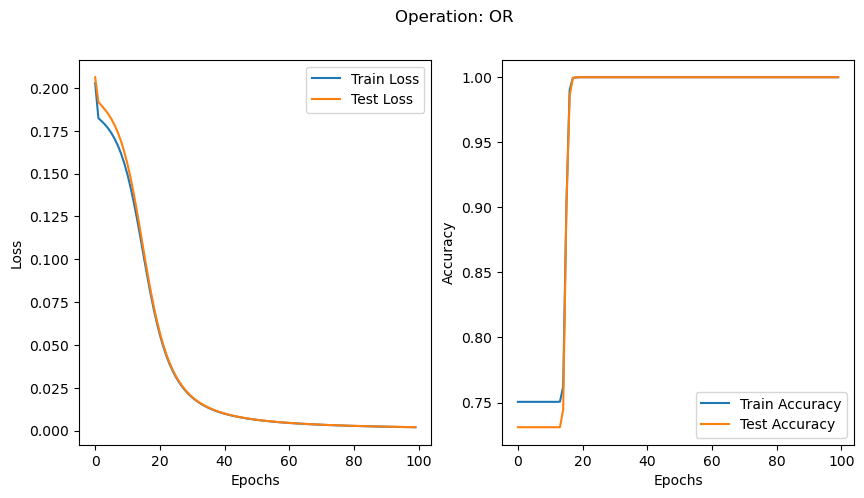

In [8]:
for i in range(len(N_list)):
    x_train,y_train,x_test,y_test = generate_data(N=N_list[i],noise_var=0.05,operation='or')
    alpha,beta, = train_model(x_train,y_train,x_test,y_test,nh=2,epochs=100,lr = lr_list[i],operation='or')

### iii) XOR OPERATION

Final :: Train Loss(Mean) 0.2501 Test Loss(Mean) 0.2429 Train Accuracy 0.5250 Test Accuracy 0.6000
Initial :: Train Loss(Mean) 0.0404 Test Loss(Mean) 0.0453 Train Accuracy 1.0000 Test Accuracy 1.0000


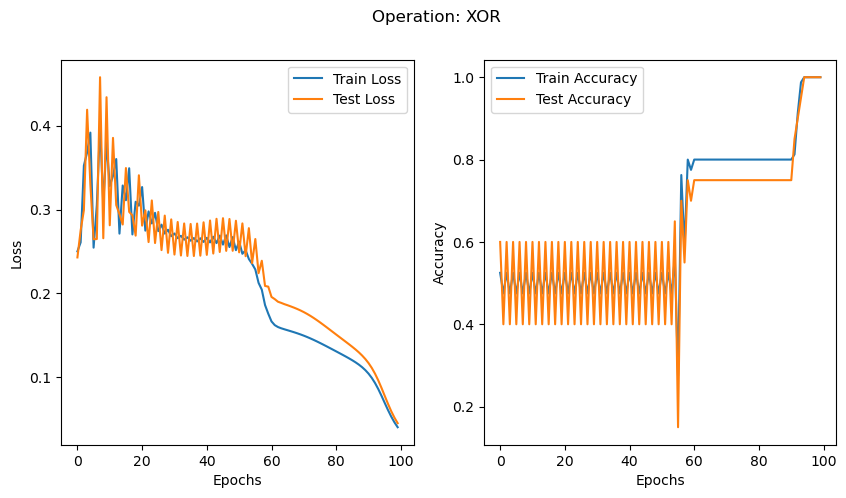

Final :: Train Loss(Mean) 0.2538 Test Loss(Mean) 0.2410 Train Accuracy 0.4838 Test Accuracy 0.5550
Initial :: Train Loss(Mean) 0.0055 Test Loss(Mean) 0.0054 Train Accuracy 1.0000 Test Accuracy 1.0000


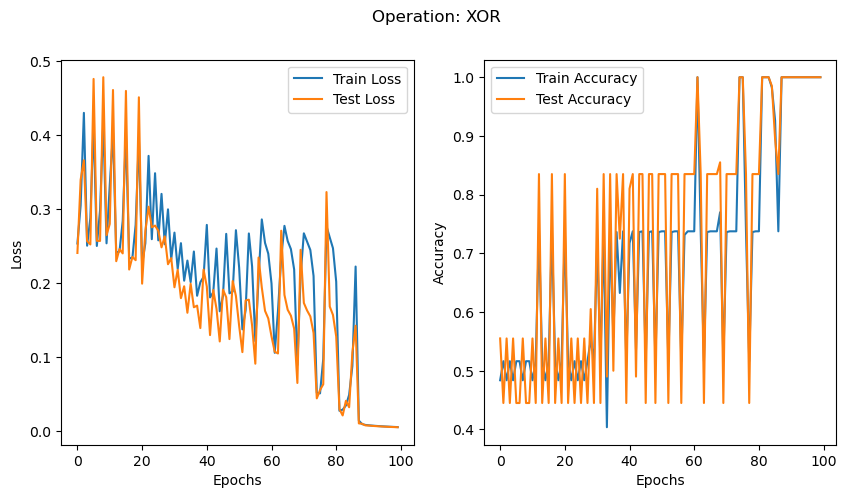

Final :: Train Loss(Mean) 0.3783 Test Loss(Mean) 0.3714 Train Accuracy 0.4961 Test Accuracy 0.5055
Initial :: Train Loss(Mean) 0.0047 Test Loss(Mean) 0.0047 Train Accuracy 1.0000 Test Accuracy 1.0000


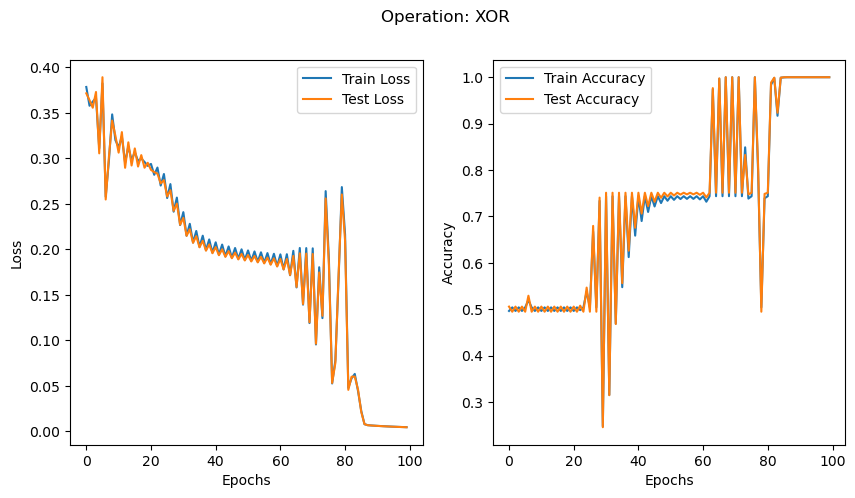

In [21]:
lr_list = [0.2,0.02,0.002]
for i in range(len(N_list)):
    x_train,y_train,x_test,y_test = generate_data(N=N_list[i],noise_var=0.05,operation='xor')
    alpha,beta, = train_model(x_train,y_train,x_test,y_test,nh=2,epochs=100,lr = lr_list[i],operation='xor')

## STOCHASTIC GRADIENT DESCENT

In [23]:

def train_model_SGD(x_train,y_train,x_test,y_test,nh =2, ni =2, no =1,epochs = 100, lr = 0.1, m =100, operation='xor'):
    
    ni = x_train.shape[0]
    no = y_train.shape[0]
    N_test = x_test.shape[1]
    N_train = x_train.shape[1]
    train_loss_list = []
    test_loss_list = []
    train_accuracy_list = []
    test_accuracy_list = []
    alpha,beta = init_weights(nh,ni,no)

    for epoch in range(epochs):
        ## Get Mini Batch
        indexes = np.random.randint(0,N_train,m)
        
        y_batch = y_train[:,indexes]

        x,z,y_pred = ANN_model(x_train,alpha,beta)
        x_batch = x[:,indexes]
        train_loss = np.sum((y_pred-y_train)**2)/N_train
        train_accuracy = np.sum(y_train==np.round(y_pred))/N_train

        _,_,y_pred_test = ANN_model(x_test,alpha,beta)
        # print(y_pred_test.shape)
        test_loss = np.sum((y_pred_test-y_test)**2)/N_test
        test_accuracy = np.sum(y_test==np.round(y_pred_test))/N_test
        
        ## Backpropagation
        z_batch = z[:,indexes]
        y_pred_batch = y_pred[:,indexes]
     
        grad_beta = 2*np.dot((y_pred_batch-y_batch)*y_pred_batch*(1-y_pred_batch),z_batch.T)
        grad_alpha = 2*np.dot(np.dot(beta[:,1:].T,(y_pred_batch-y_batch)*y_pred_batch*(1-y_pred_batch)) *z_batch[1:,:]*(1-z_batch[1:,:]),x_batch.T)

        beta = beta - lr*grad_beta
        alpha = alpha - lr*grad_alpha
        
    
        train_loss_list.append(train_loss)
        test_loss_list.append(test_loss)
        train_accuracy_list.append(train_accuracy)
        test_accuracy_list.append(test_accuracy)

        if epoch%(epochs-1) == 0:
            if epoch == 0:
                print(f'Final :: Train Loss(Mean) {train_loss:.4f} Test Loss(Mean) {test_loss:.4f} Train Accuracy {train_accuracy:.4f} Test Accuracy {test_accuracy:.4f}')
            else:
                print(f'Initial :: Train Loss(Mean) {train_loss:.4f} Test Loss(Mean) {test_loss:.4f} Train Accuracy {train_accuracy:.4f} Test Accuracy {test_accuracy:.4f}')
    
     ## Plotting Loss and Accuracy
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.plot(train_loss_list,label='Train Loss')
    plt.plot(test_loss_list,label='Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(train_accuracy_list,label='Train Accuracy')
    plt.plot(test_accuracy_list,label='Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.suptitle('Operation: '+operation.upper())
    plt.show()

    return alpha,beta
        

## EXPERIMENTING WITH DIFFERENT VALUES OF M = 10,100,500

### i) AND OPERATION

Final :: Train Loss(Mean) 0.5930 Test Loss(Mean) 0.5855 Train Accuracy 0.2487 Test Accuracy 0.2580
Initial :: Train Loss(Mean) 0.0303 Test Loss(Mean) 0.0306 Train Accuracy 1.0000 Test Accuracy 1.0000


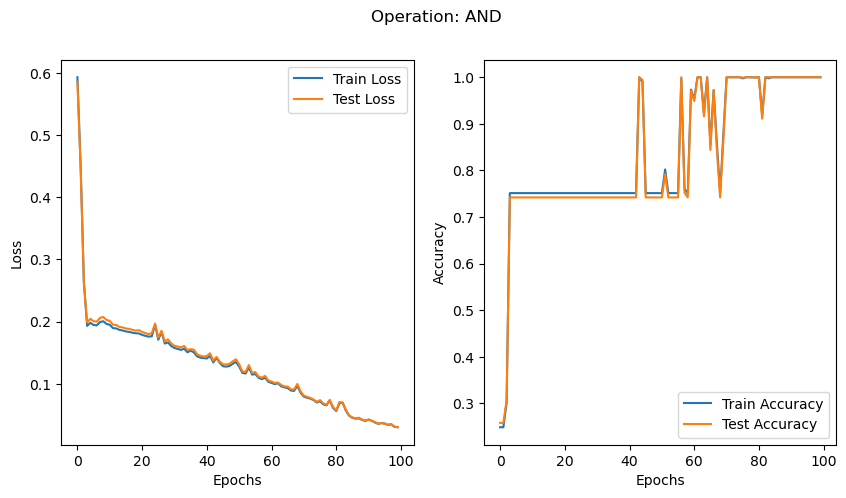

Final :: Train Loss(Mean) 0.3242 Test Loss(Mean) 0.3254 Train Accuracy 0.2582 Test Accuracy 0.2550
Initial :: Train Loss(Mean) 0.0024 Test Loss(Mean) 0.0024 Train Accuracy 1.0000 Test Accuracy 1.0000


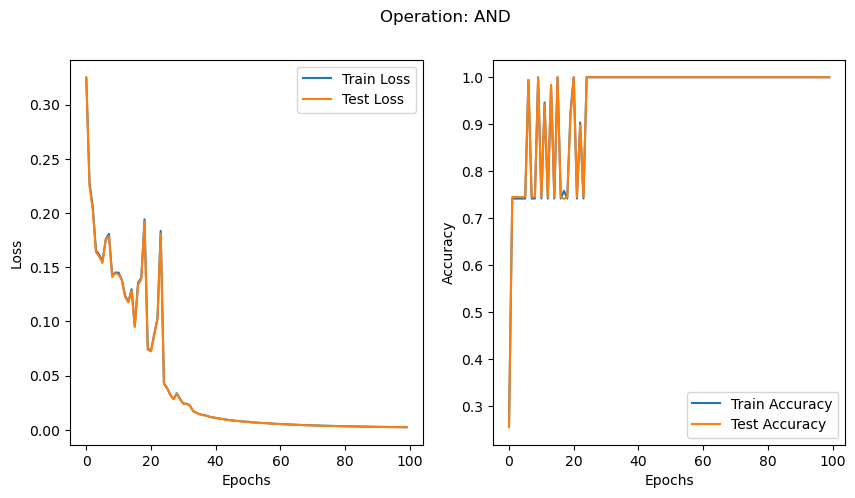

Final :: Train Loss(Mean) 0.2519 Test Loss(Mean) 0.2542 Train Accuracy 0.5960 Test Accuracy 0.5890
Initial :: Train Loss(Mean) 0.0013 Test Loss(Mean) 0.0012 Train Accuracy 1.0000 Test Accuracy 1.0000


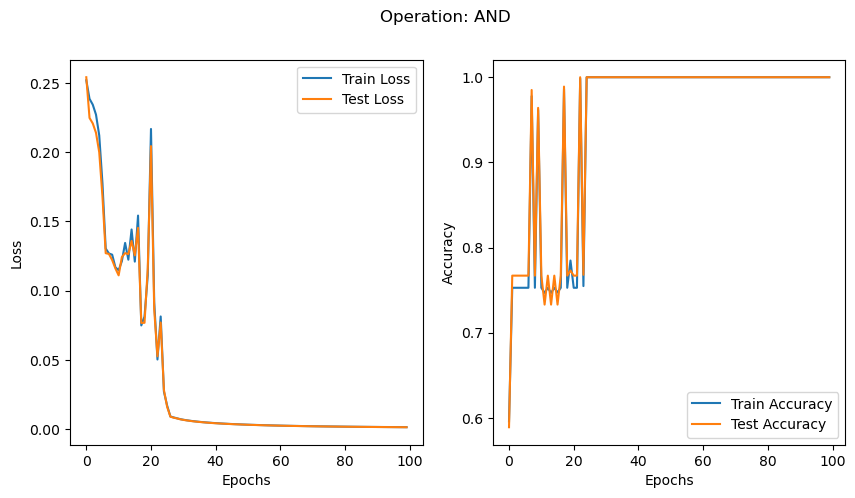

In [24]:
### Experimenting with different values of m
m_list = [10,100,500]
lr_list = [0.3,0.1,0.05]
for i in range(len(m_list)):
    x_train,y_train,x_test,y_test = generate_data(N=5000,noise_var=0.05,operation='and')
    train_model_SGD(x_train,y_train,x_test,y_test,nh=2,epochs=100,lr=lr_list[i],m=m_list[i],operation='and')

## ii) OR OPERATION

Final :: Train Loss(Mean) 0.1949 Test Loss(Mean) 0.1963 Train Accuracy 0.7502 Test Accuracy 0.7480
Initial :: Train Loss(Mean) 0.0089 Test Loss(Mean) 0.0090 Train Accuracy 1.0000 Test Accuracy 1.0000


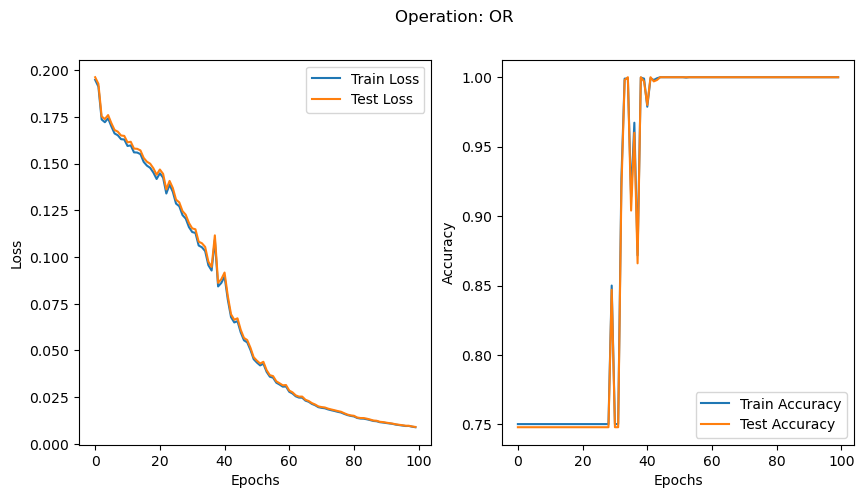

Final :: Train Loss(Mean) 0.5113 Test Loss(Mean) 0.5012 Train Accuracy 0.2517 Test Accuracy 0.2670
Initial :: Train Loss(Mean) 0.0017 Test Loss(Mean) 0.0017 Train Accuracy 1.0000 Test Accuracy 1.0000


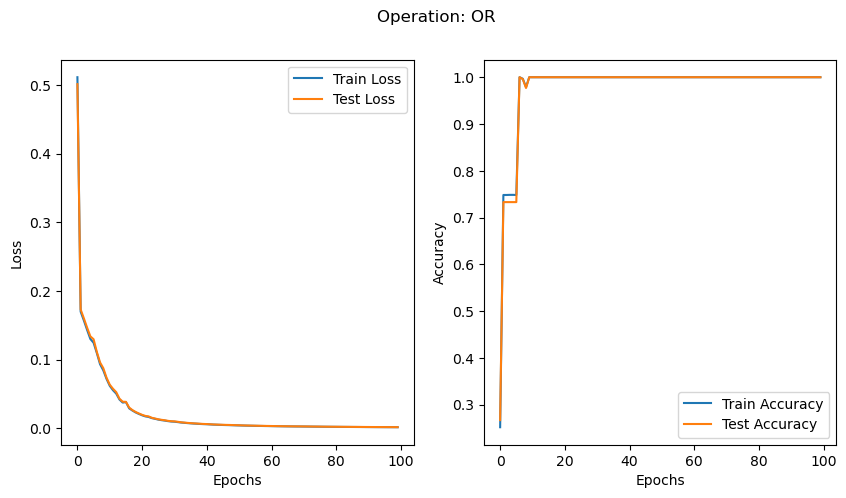

Final :: Train Loss(Mean) 0.1976 Test Loss(Mean) 0.1903 Train Accuracy 0.7502 Test Accuracy 0.7670
Initial :: Train Loss(Mean) 0.0007 Test Loss(Mean) 0.0007 Train Accuracy 1.0000 Test Accuracy 1.0000


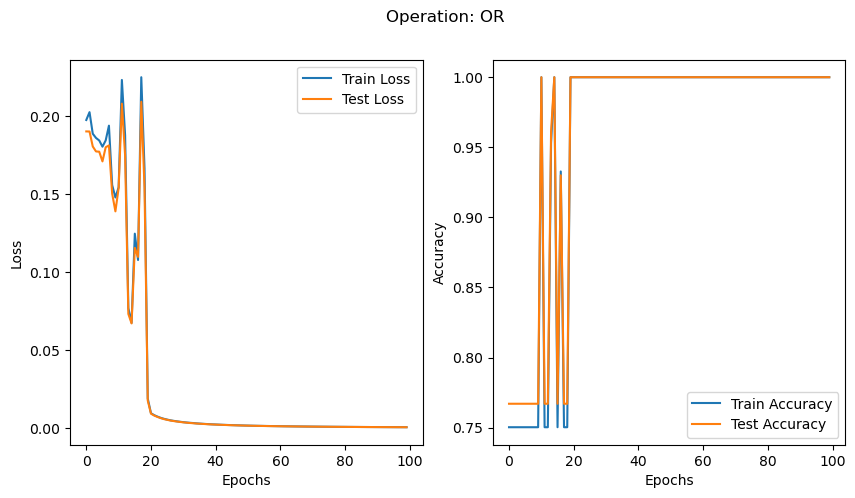

In [25]:
for i in range(len(m_list)):
    x_train,y_train,x_test,y_test = generate_data(N=5000,noise_var=0.05,operation='or')
    train_model_SGD(x_train,y_train,x_test,y_test,nh=2,epochs=100,lr=lr_list[i],m=m_list[i],operation='or')


## iii) XOR OPERATION

Final :: Train Loss(Mean) 0.2784 Test Loss(Mean) 0.2752 Train Accuracy 0.4950 Test Accuracy 0.5080
Initial :: Train Loss(Mean) 0.0006 Test Loss(Mean) 0.0006 Train Accuracy 1.0000 Test Accuracy 1.0000


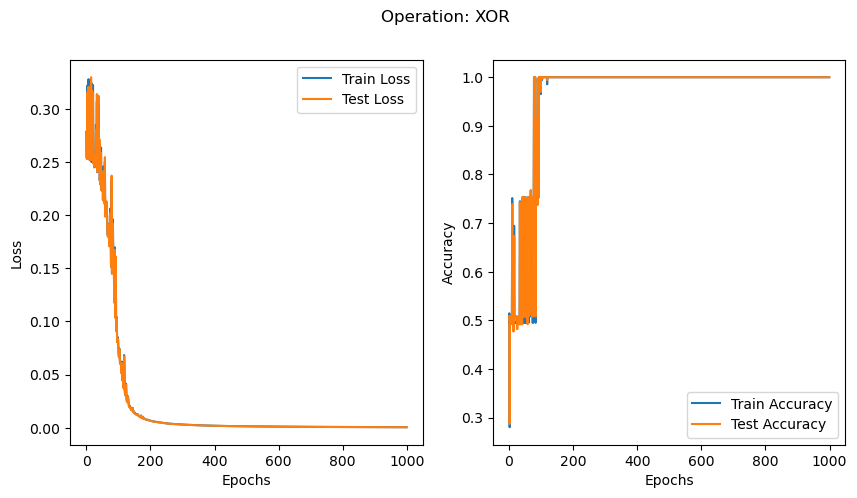

Final :: Train Loss(Mean) 0.4241 Test Loss(Mean) 0.4287 Train Accuracy 0.4953 Test Accuracy 0.4900
Initial :: Train Loss(Mean) 0.0011 Test Loss(Mean) 0.0011 Train Accuracy 1.0000 Test Accuracy 1.0000


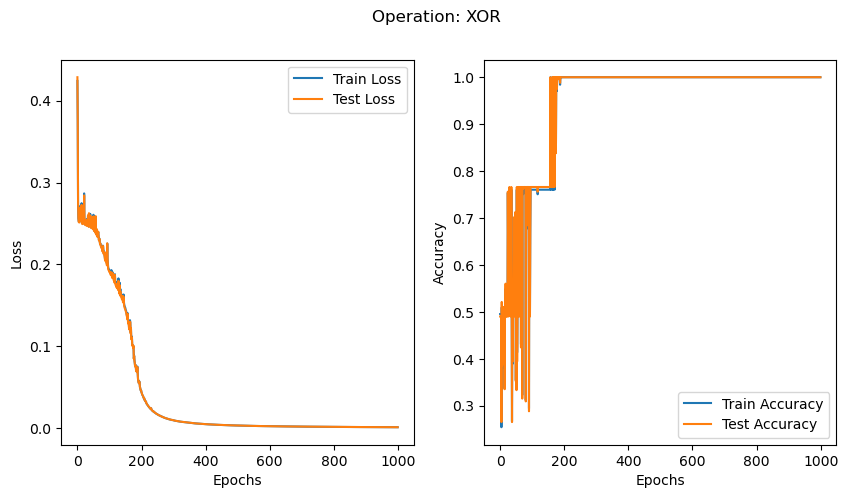

Final :: Train Loss(Mean) 0.2751 Test Loss(Mean) 0.2730 Train Accuracy 0.4843 Test Accuracy 0.4930
Initial :: Train Loss(Mean) 0.0007 Test Loss(Mean) 0.0006 Train Accuracy 1.0000 Test Accuracy 1.0000


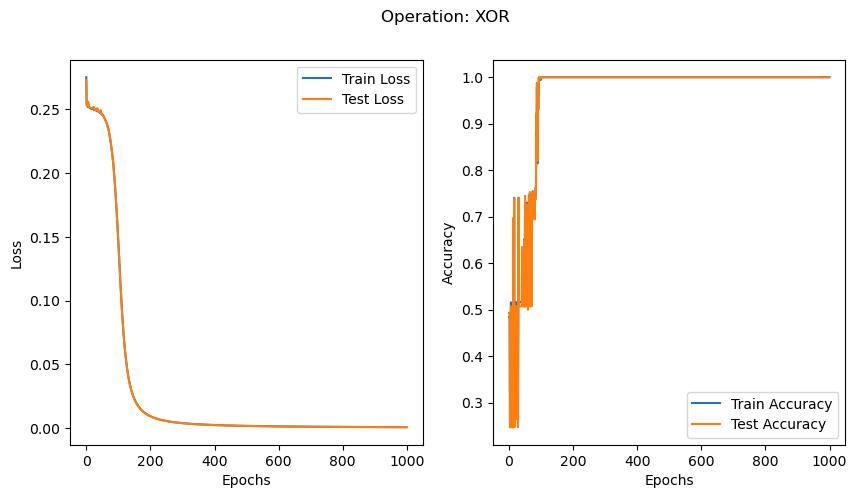

In [27]:
lr_list = [0.6,0.06,0.01]
for i in range(len(m_list)):
    x_train,y_train,x_test,y_test = generate_data(N=5000,noise_var=0.05,operation='xor')
    train_model_SGD(x_train,y_train,x_test,y_test,nh=2,epochs=1000,lr=lr_list[i],m=m_list[i],operation='xor')


## OBSERVATIONS AND REMARKS
### 1. The learning rate should be changed depending on the number of samples (N) because the gradients involve dot products and hence scale with N. If we fix the batch size (m) for SGD, then the learning rate should be changed depending on m and not N
### 2. The AND and OR Operations are easier to train. The XOR operation's training convergence relies heavily on initialisation of weights and learning rate. In most cases, it takes more epochs to converge